In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [5]:
import os
import random

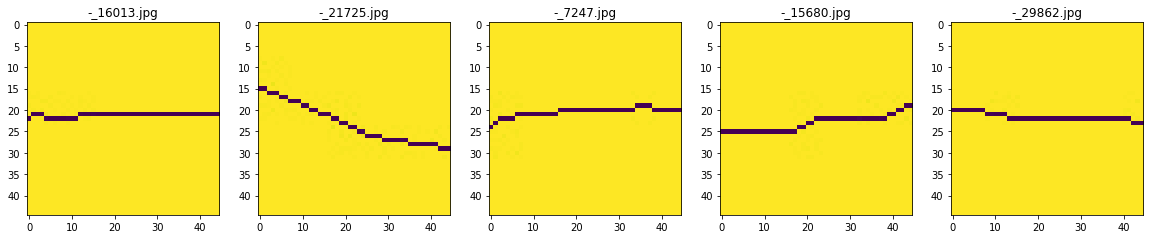

In [7]:
plt.figure(figsize=(20,20))
img_folder=r'.\data\train\-'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [8]:
def create_dataset(train_img):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(train_img):
        
        for file in os.listdir(os.path.join(train_img, dir1)):
       
            image_path= os.path.join(train_img, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'.\data\train')

In [9]:
print(len(class_name))
print(len(img_data))

48060
48060


In [10]:
print(img_data[0])

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [9]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 '=': 12,
 'times': 13}

In [10]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [11]:
# Reshaping img_data Matrix
for i in range(len(img_data)):
    img_data[i]=img_data[i].flatten()

In [12]:
X=np.array(img_data)
y=np.array(target_val)
y=y.reshape(-1,1)

In [15]:
print(X.shape)
print(y.shape)

(48060, 2025)
(48060, 1)


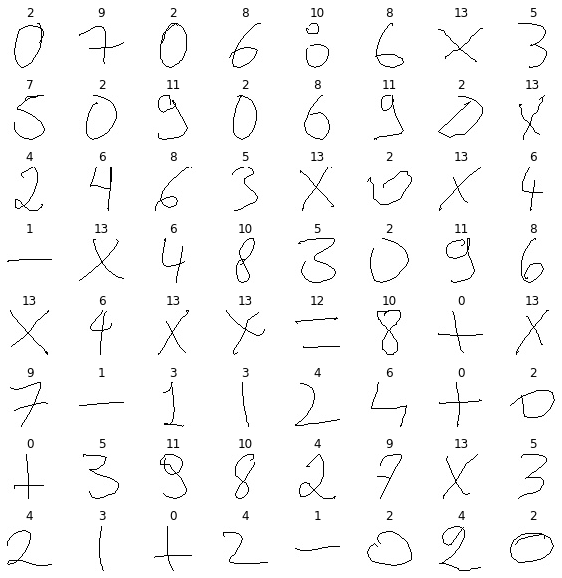

In [13]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape(45,45)
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [21]:

model = Sequential(
    [               
        tf.keras.Input(shape=(2025,)),    #specify input size
        
        Dense(units=25,activation="relu",name="Layer_1"),
        Dense(units=15,activation="relu",name="Layer_2"),
        Dense(units=14,activation="linear",name="Layer_3")
        
    ], name = "my_model" 
)

In [22]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 25)                50650     
                                                                 
 Layer_2 (Dense)             (None, 15)                390       
                                                                 
 Layer_3 (Dense)             (None, 14)                224       
                                                                 
Total params: 51,264
Trainable params: 51,264
Non-trainable params: 0
_________________________________________________________________


In [23]:
[layer1,layer2,layer3] = model.layers

In [24]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (2025, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 14), b3 shape = (14,)


In [25]:
print(model.layers[2].weights)

[<tf.Variable 'Layer_3/kernel:0' shape=(15, 14) dtype=float32, numpy=
array([[-0.07497731,  0.345757  ,  0.06771189, -0.23299806, -0.10514113,
        -0.42573676,  0.16167337, -0.42084244,  0.22113591, -0.23921172,
        -0.2128468 , -0.25382745,  0.08699876, -0.2736799 ],
       [-0.3508281 , -0.28233105, -0.07660833, -0.12559506, -0.13091415,
        -0.1995086 ,  0.12656152,  0.13731438, -0.4245174 ,  0.35393023,
        -0.40415257, -0.2550776 , -0.35629666,  0.3596897 ],
       [ 0.40836507,  0.26540804, -0.26481408, -0.3057214 , -0.1717382 ,
         0.06268841,  0.09586859, -0.25120628,  0.1160754 ,  0.40866345,
         0.3874303 ,  0.21291596,  0.41669327,  0.00328767],
       [-0.43977693,  0.3146981 , -0.02798751,  0.01093122,  0.12405968,
         0.33562136, -0.05207974,  0.36759645,  0.23578894,  0.22043926,
        -0.3835398 ,  0.23360765, -0.27029723, -0.00505784],
       [-0.09447268,  0.4446872 , -0.44097212,  0.08020902,  0.15066016,
         0.3524006 , -0.21634

In [47]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
)

history = model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0743
Epoch 2/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0744
Epoch 3/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0729
Epoch 4/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0756
Epoch 5/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0736
Epoch 6/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0742
Epoch 7/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0729
Epoch 8/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0710
Epoch 9/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0726
Epoch 10/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0706
Epoch 11/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0715
Epoch 12/100
1502/1502 [==============================] - 2s 1ms/step - lo

1502/1502 [==============================] - 2s 2ms/step - loss: 0.0383
Epoch 98/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0376
Epoch 99/100
1502/1502 [==============================] - 2s 1ms/step - loss: 0.0394
Epoch 100/100
1502/1502 [==============================] - 2s 2ms/step - loss: 0.0360


1/1 [==============================] - 0s 18ms/step


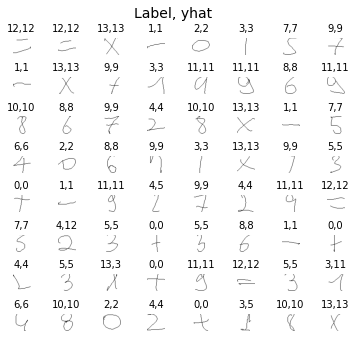

In [124]:

# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((45,45))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,2025))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [112]:
print(model.layers[0].weights)

[<tf.Variable 'Layer_1/kernel:0' shape=(2025, 45) dtype=float32, numpy=
array([[-0.05600479, -0.01954394,  0.0514442 , ..., -0.00915722,
         0.02476559,  0.02895577],
       [ 0.02094403,  0.03989792,  0.0101983 , ..., -0.01555166,
         0.05257108,  0.04528451],
       [ 0.02398207,  0.01340527,  0.0228129 , ...,  0.03350353,
         0.01611425, -0.02816286],
       ...,
       [-0.03005926,  0.00562548,  0.03943464, ..., -0.03562635,
        -0.00854132,  0.00827322],
       [ 0.01374726, -0.01973877, -0.03106617, ...,  0.01094219,
         0.00183707, -0.04866336],
       [-0.0610636 ,  0.03475214, -0.03645231, ..., -0.01459979,
         0.02944521,  0.04224208]], dtype=float32)>, <tf.Variable 'Layer_1/bias:0' shape=(45,) dtype=float32, numpy=
array([-0.00412423, -0.00087394, -0.00151733,  0.02266791, -0.01151408,
       -0.00083835,  0.        , -0.00443882,  0.00220074,  0.00661922,
        0.        ,  0.02143194, -0.00129039, -0.00162147,  0.00926075,
       -0.00164266

In [48]:
model.save('myModel2.h5')

In [49]:
path = 'weights_folder/my_weights2'
model.save_weights(path)

In [18]:
# Loading Data For Testing
test_data, testclass_name =create_dataset(r'.\dataSet\test')
testtarget_dict={k: v for v, k in enumerate(np.unique(testclass_name))}
testtarget_dict
testtarget_val=  [testtarget_dict[testclass_name[i]] for i in range(len(testclass_name))]
# Reshaping test_data Matrix
for i in range(len(test_data)):
    test_data[i]=test_data[i].flatten()
X_test=np.array(test_data)
y_test=np.array(testtarget_val)
y_test=y_test.reshape(-1,1)

In [50]:
print(X_test.shape)
print(y_test.shape)

(1400, 2025)
(1400, 1)


In [51]:
score = model.evaluate(X_test, y_test, verbose=0)
print((score*100))

12.954354286193848
